In [ ]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

In [ ]:
img = np.load('./u2os-lmna/5-29-19_output/5/image.npy')

In [3]:
def normalize_image(img):
    
    if len(img.shape) == 2:
        
        percentile = 99.9
        high = np.percentile(img, percentile)
        low = np.percentile(img, 100-percentile)

        img = np.minimum(high, img)
        img = np.maximum(low, img)

        img = (img - low) / (high - low) # gives float64, thus cast to 8 bit later
        img = skimage.img_as_ubyte(img)

        # make a RGB-channel color image
        img_norm = np.stack([img, img, img], axis=-1)
        
    else:
        img_norm = np.zeros(img.shape, dtype='uint8')
        for ix in range(img.shape[2]):
            
            img_channel =  img[:,:,ix]
            percentile = 99.9
            high = np.percentile(img_channel, percentile)
            low = np.percentile(img_channel, 100-percentile)

            img_channel = np.minimum(high, img_channel)
            img_channel = np.maximum(low, img_channel)

            img_channel = (img_channel - low) / (high - low) # gives float64, thus cast to 8 bit later
            img_norm[:,:,ix] = skimage.img_as_ubyte(img_channel)
            
    return img_norm

/home/srirampendyala/anaconda3/envs/deep-learning/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/srirampendyala/anaconda3/envs/deep-learning/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/srirampendyala/anaconda3/envs/deep-learning/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


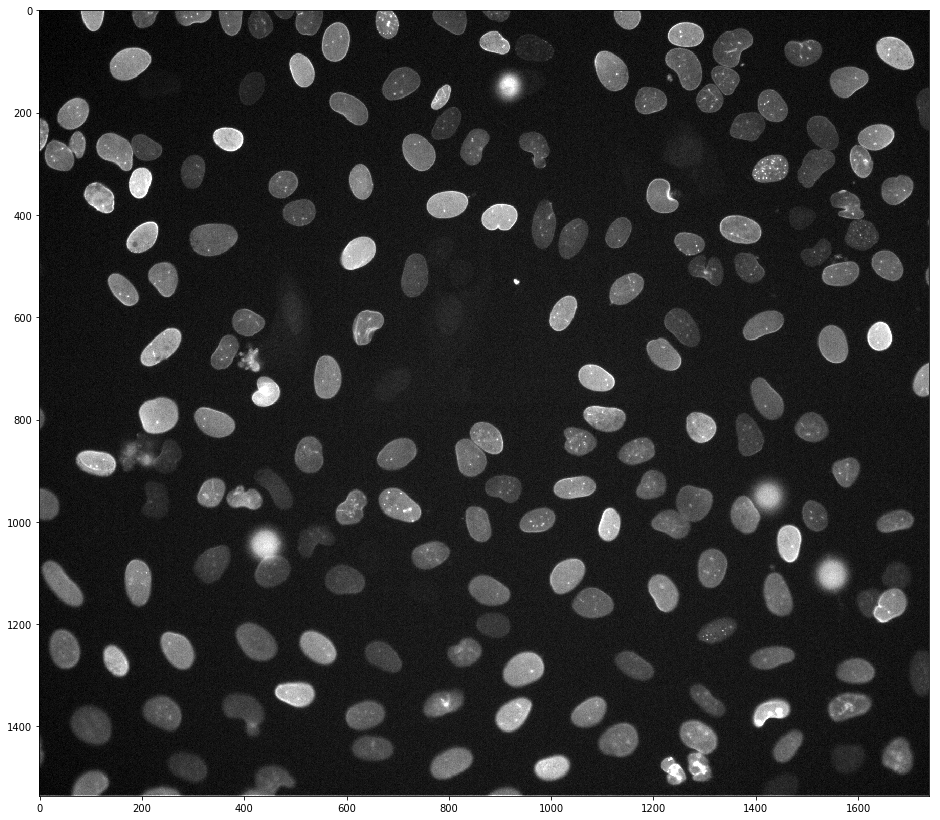

In [4]:
plt.figure(num=None, figsize=(13.5,11.5))
skimage.io.imshow(normalize_image(img[:,:,0]))
plt.show()